This very small dataset with only 30 records in two columns, it is about the givin salary according to the years of experiances. In this notebook I will do basic analysis and processing of data and then apply the simple regression model through spliting the givin data to train set (2/3 of records) and test set (1/3) of records. We will try other models like statsmodels.sandbox.regression

In [1]:
# Importing the libraries 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

In [4]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [8]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


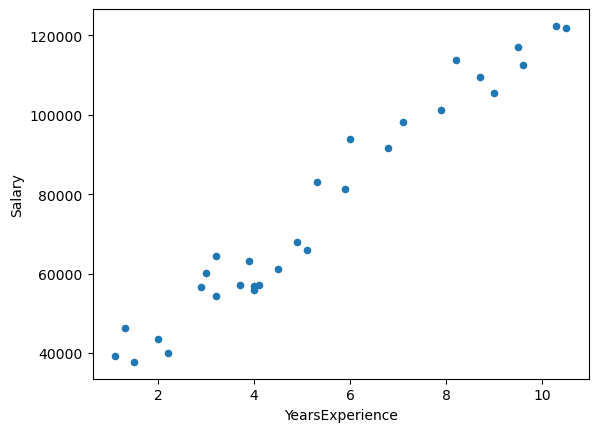

In [9]:
dataset.plot.scatter(x='YearsExperience' ,y = 'Salary')
plt.show()

In [10]:
# setting X (the independent variable) to Years of Experience and y (the target) 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [11]:
# Splitting the dataset into the Training set and Test set 
# Split the dataset into Training Set (2⁄3) and Test Set (1⁄3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [12]:
# Fitting Simple Linear Regression to the Training set 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
LinearRegression()

LinearRegression()

In [14]:
# Predicting the Test set results 

y_pred = regressor.predict(X_test)

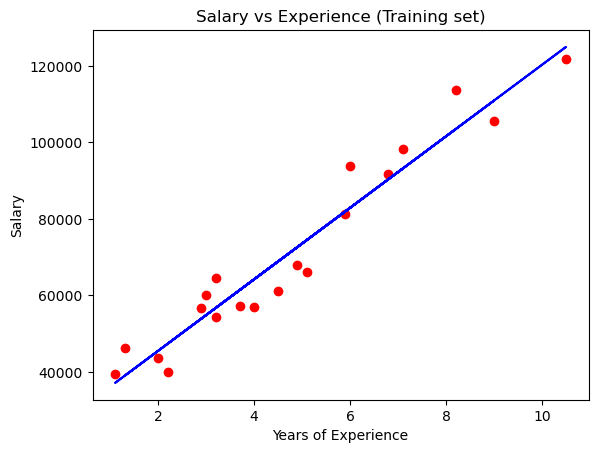

In [15]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_train, regressor.predict(X_train), color = 'blue') 
plt.title('Salary vs Experience (Training set)') 
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

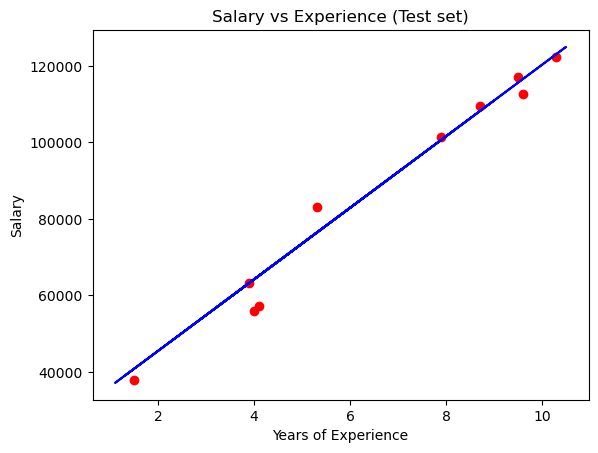

In [16]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
# Calculating mean absolute error
print(mean_absolute_error(y_test, y_pred),'$')

3426.4269374307123 $


In [18]:
# coefficients value
print(regressor.coef_, '$')

[9345.94244312] $


In [19]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm

In [20]:
y_pred = regressor.predict(X_test)
model1=sm.OLS(y_train,X_train)
result = model1.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.963     
Dependent Variable:     y                AIC:                         440.7201  
Date:                   2025-05-07 14:17 BIC:                         441.7159  
No. Observations:       20               Log-Likelihood:              -219.36   
Df Model:               1                F-statistic:                 525.3     
Df Residuals:           19               Prob (F-statistic):          2.64e-15  
R-squared (uncentered): 0.965            Scale:                       2.0725e+08
------------------------------------------------------------------------------------
          Coef.        Std.Err.        t        P>|t|        [0.025         0.975]  
------------------------------------------------------------------------------------
x1      13753.6496     600.0766     22.9198     0.0000     12497.6749     15009.6244
--------------------------------------------------------------------------------
Omnibus:                    0.809             Durbin-Watson:               2.456
Prob(Omnibus):              0.667             Jarque-Bera (JB):            0.454
Skew:                       -0.361            Prob(JB):                    0.797
Kurtosis:                   2.843             Condition No.:               1    
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

From the above summary we can say that the percentage of error in this model is less than 4% (R squared = 0.963)